In [ ]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns

import scipy.stats as stats

from sklearn.model_selection import train_test_split
from sklearn.metrics import accuracy_score
from sklearn.model_selection import cross_val_score

from sklearn.preprocessing import KBinsDiscretizer
from sklearn.linear_model import LogisticRegression
from sklearn.tree import DecisionTreeClassifier

from sklearn.preprocessing import FunctionTransformer
from sklearn.compose import ColumnTransformer

In [ ]:
from google.colab import files
uploaded = files.upload()

Saving Titanic-Dataset.csv to Titanic-Dataset.csv


In [ ]:
df= pd.read_csv('Titanic-Dataset.csv',usecols=['Age','Fare','Survived'])

In [ ]:
df.head()

,Survived,Age,Fare
0,0,22.0,7.2500
1,1,38.0,71.2833
2,1,26.0,7.9250
3,1,35.0,53.1000
4,0,35.0,8.0500


In [ ]:
df.isnull().mean()*100

,0
Survived,0.00000
Age,19.86532
Fare,0.00000


# TRAIN TEST SPLIT

In [ ]:
x= df.drop(columns=['Survived'])
y= df['Survived']

In [ ]:
x_train,x_test,y_train,y_test= train_test_split(x,y,test_size=0.2,random_state=2)

In [ ]:
x_train

,Age,Fare
30,40.0,27.7208
10,4.0,16.7000
873,47.0,9.0000
182,9.0,31.3875
876,20.0,9.8458
...,...,...
534,30.0,8.6625
584,NaN,8.7125
493,71.0,49.5042
527,NaN,221.7792


In [ ]:
x_train["new_age"] = x_train['Age']
x_test["new_age"] = x_test['Age']

In [ ]:
x_train["new_age"][x_train["new_age"].isnull()] = x_train['Age'].dropna().sample(x_train["Age"].isnull().sum()).values
x_test["new_age"][x_test["new_age"].isnull()] = x_test['Age'].dropna().sample(x_test["Age"].isnull().sum()).values

In [ ]:
 x_train['Age'].dropna().sample(x_train["Age"].isnull().sum()).values

array([54.  , 43.  , 16.  , 24.  , 19.  , 41.  , 36.  , 19.  , 19.  ,
       24.  , 52.  , 14.5 , 28.5 , 31.  , 25.  , 32.  , 45.  , 28.  ,
       56.  , 32.  , 37.  , 38.  , 58.  , 26.  , 36.  ,  3.  ,  3.  ,
       61.  ,  6.  , 22.  , 41.  , 27.  , 24.  , 50.  , 23.  , 57.  ,
       28.  , 32.  , 25.  , 19.  , 33.  , 35.  , 28.  , 25.  , 41.  ,
       59.  , 45.  , 18.  , 21.  , 31.  ,  0.75, 17.  , 26.  , 46.  ,
       51.  , 14.  , 18.  , 40.  , 31.  , 24.  , 14.  ,  8.  ,  7.  ,
       11.  , 22.  , 40.5 , 19.  , 28.  , 54.  , 20.  , 24.  , 39.  ,
       30.  , 15.  , 32.  , 47.  , 27.  , 46.  , 24.  , 38.  , 24.  ,
       65.  , 26.  , 62.  , 29.  , 30.  , 32.  ,  4.  , 20.  , 16.  ,
       36.  , 45.  , 49.  , 66.  ,  1.  , 63.  , 47.  , 42.  , 28.  ,
       21.  , 45.  , 29.  , 13.  , 29.  , 42.  , 33.  , 18.  , 48.  ,
       30.  , 44.  , 18.  , 39.  ,  0.67, 18.  , 28.  , 29.  , 33.  ,
       28.  , 21.  , 25.  , 22.  ,  7.  , 35.  , 31.  , 20.  , 27.  ,
       25.  , 29.  ,

In [ ]:
x_train["Age"].isnull().sum()

148

In [ ]:
x_train

,Age,Fare,new_age
30,40.0,27.7208,40.0
10,4.0,16.7000,4.0
873,47.0,9.0000,47.0
182,9.0,31.3875,9.0
876,20.0,9.8458,20.0
...,...,...,...
534,30.0,8.6625,30.0
584,NaN,8.7125,2.0
493,71.0,49.5042,71.0
527,NaN,221.7792,26.0


# PLOTTING TO COMPARE

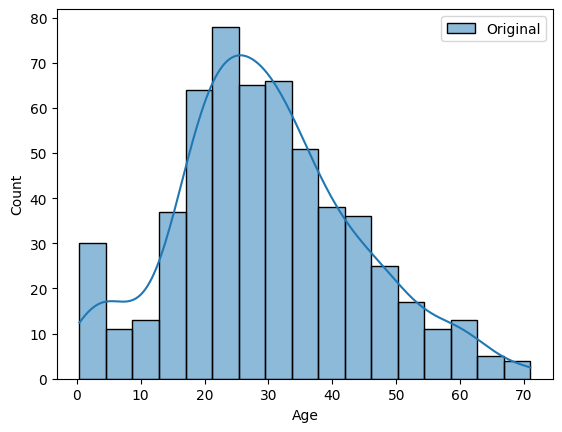

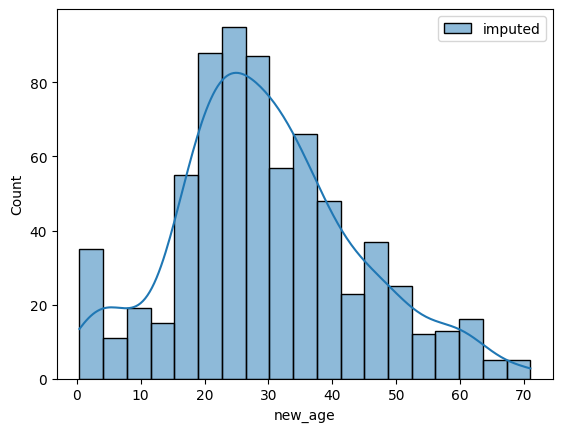

In [ ]:
sns.histplot(x_train['Age'],label='Original',kde=True)
plt.legend()
plt.show()

sns.histplot(x_train['new_age'],label='imputed',kde=True)
plt.legend()
plt.show()

# FIND VARIANCE

In [ ]:
print("original variable variance:" , x_train['Age'].var())
print("variance after random imputation: " , x_train['new_age'].var())

original variable variance: 204.34951339046142
variance after random imputation:  201.5184522999336


# FIND COVARIANCE

In [ ]:
x_train[['Fare','Age','new_age']].cov()

,Fare,Age,new_age
Fare,2368.246832,71.512440,61.549477
Age,71.512440,204.349513,204.349513
new_age,61.549477,204.349513,201.518452


# BOX-PLOT:

<Axes: >

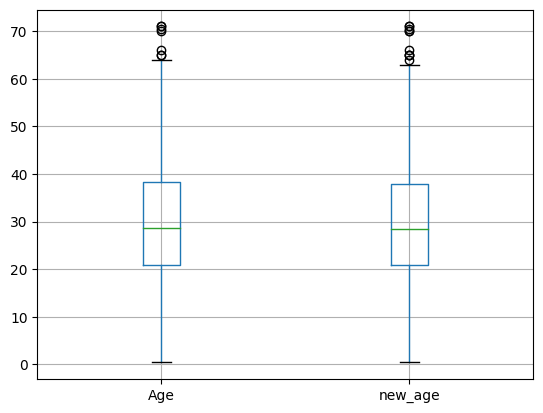

In [ ]:
x_train[['Age','new_age']].boxplot()